In [1]:
#freeview -f $SUBJECTS_DIR/fsaverage/surf/lh.inflated:annot=aparc.annot:annot_outline=1:overlay=lh.patient_control.glmdir/group.diff/sig.mgh:overlay_threshold=3,5 -viewport 3d -layout 1

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re
from scipy import stats
import matplotlib.transforms as transforms

In [4]:
def add_group(df,df2):
    for row in range(0, len(scan_info.index)):
                # index values of every row with inclusion criteria (obain task name and run #)
                if element in scan_info.iloc[row,1]:
                    print('Currently unpacking functional runs for '+element)
                    if userinput == 1:
                        scan_name_index.append(scan_info.iloc[row,1])
                        scan_num_index.append(scan_info.iloc[row,0])
                    else:
                        #exit the whole loop
                        # ask for confirmation of task contents (these are all the runs)
                        instring = 'Would you like to include run '+str(scan_info.iloc[row,1])+' for task '+str(element)+' ?'
                        userinput = verifyrun(instring)


In [5]:
def parserow(rows,cols,rois):
    lastrowL = (rows*cols)
    lastrowF = (rows*cols)-(cols)
    return [rois[i] for i in range(lastrowF, lastrowL)]

In [6]:
def makenames(rois):
    trunc_aseg = list(rois)
    trunc_aseg[2] = 'L-Cerebellum-WM'
    trunc_aseg[3] = 'L-Cerebellum-Ctx'
    trunc_aseg[18] = 'R-Lat-Ventricle'
    trunc_aseg[20] = 'R-Cerebellum-WM'
    trunc_aseg[21] = 'R-Cerebellum-Ctx'
    trunc_aseg[33] = 'WM-hypo-I'
    trunc_aseg[34] = 'L-WM-hypo-I'
    trunc_aseg[35] = 'R-WM-hypo-I'
    trunc_aseg[36] = 'Non-WM-hypo-I'
    trunc_aseg[37] = 'L-Non-WM-hypo-I'
    trunc_aseg[38] = 'R-Non-WM-hypo-I'
    trunc_aseg[46] = 'SegVNotVent'
    trunc_aseg[47] = 'SegVNotVentSurf'
    trunc_aseg[51] = 'lhCerebralWMVol'
    trunc_aseg[52] = 'rhCerebralWMVol'
    trunc_aseg[53] = 'CerebralWMVol'
    trunc_aseg[56] = 'SupraTentVol'
    trunc_aseg[57] = 'SupraTentVNoVtrc'
    trunc_aseg[58] = 'SupraTentVNoVtrcV'
    trunc_aseg[65] = 'eTotalICV'
    return trunc_aseg

aseg
66
Left-Lateral-Ventricle
Left-Inf-Lat-Vent
L-Cerebellum-WM
L-Cerebellum-Ctx
Left-Thalamus-Proper
Left-Caudate
Left-Putamen
Left-Pallidum
3rd-Ventricle
4th-Ventricle
Brain-Stem
Left-Hippocampus
Left-Amygdala
CSF
Left-Accumbens-area
Left-VentralDC
Left-vessel
Left-choroid-plexus
R-Lat-Ventricle
Right-Inf-Lat-Vent
R-Cerebellum-WM
R-Cerebellum-Ctx
Right-Thalamus-Proper
Right-Caudate
Right-Putamen
Right-Pallidum
Right-Hippocampus
Right-Amygdala
Right-Accumbens-area
Right-VentralDC
Right-vessel
Right-choroid-plexus
5th-Ventricle
WM-hypo-I
L-WM-hypo-I
R-WM-hypo-I
Non-WM-hypo-I
L-Non-WM-hypo-I
R-Non-WM-hypo-I
Optic-Chiasm
CC_Posterior
CC_Mid_Posterior
CC_Central
CC_Mid_Anterior
CC_Anterior
BrainSegVol
SegVNotVent
SegVNotVentSurf
lhCortexVol
rhCortexVol
CortexVol
lhCerebralWMVol
rhCerebralWMVol
CerebralWMVol
SubCortGrayVol
TotalGrayVol
SupraTentVol
SupraTentVNoVtrc
SupraTentVNoVtrcV
MaskVol
BrainSegVol-to-eTIV
MaskVol-to-eTIV
lhSurfaceHoles
rhSurfaceHoles
SurfaceHoles
eTotalICV
lh
37
ther

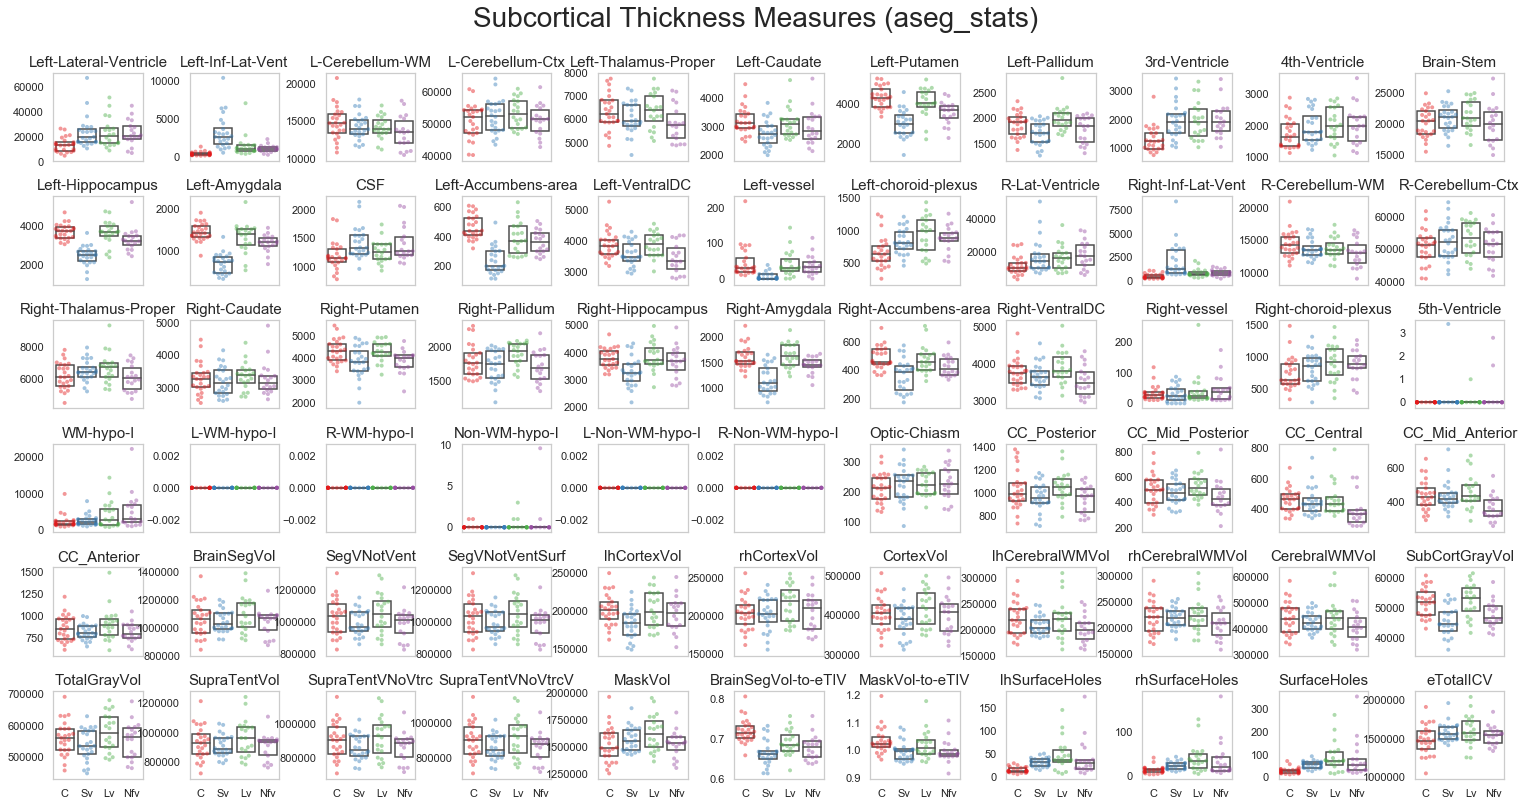

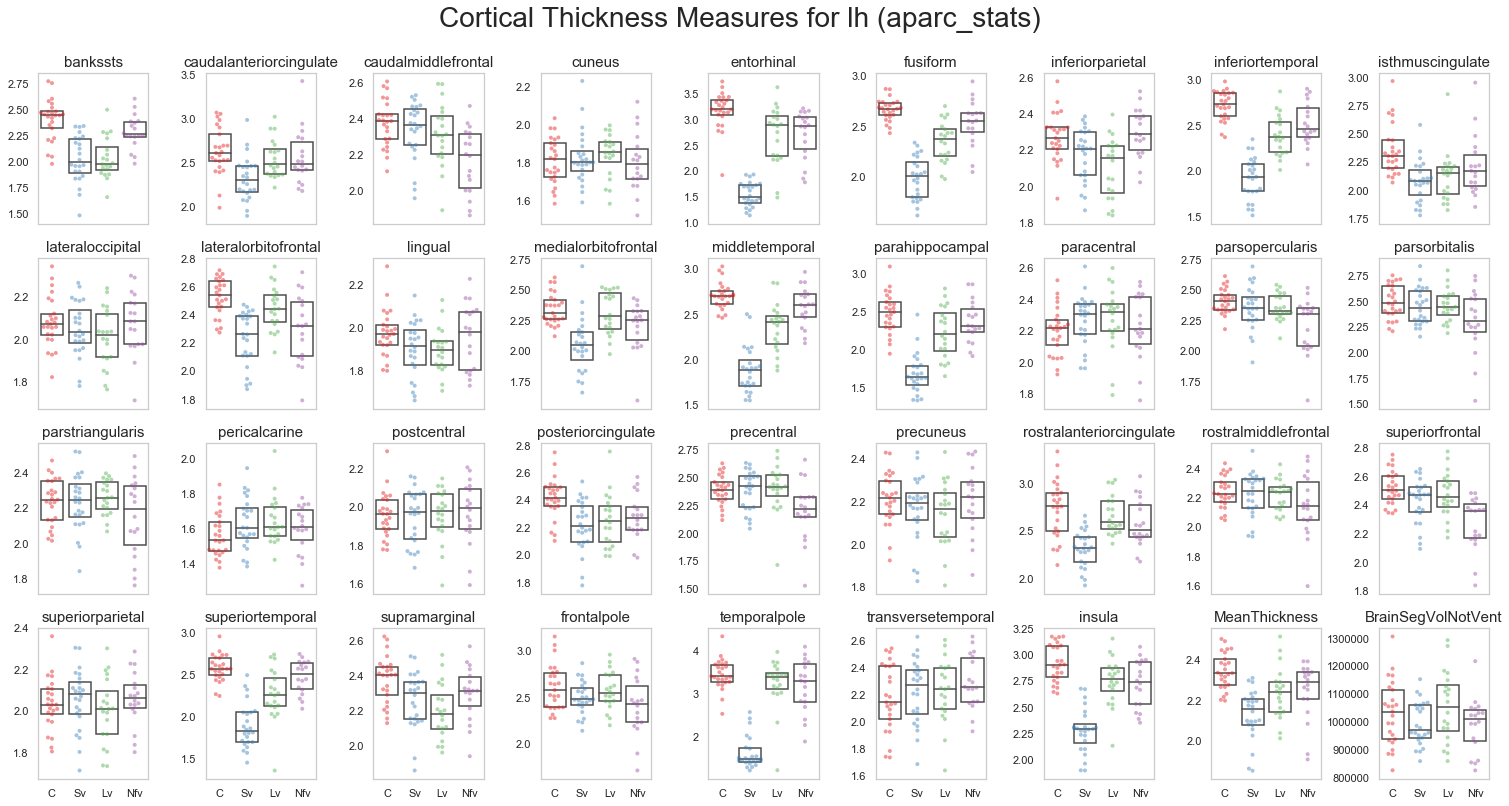

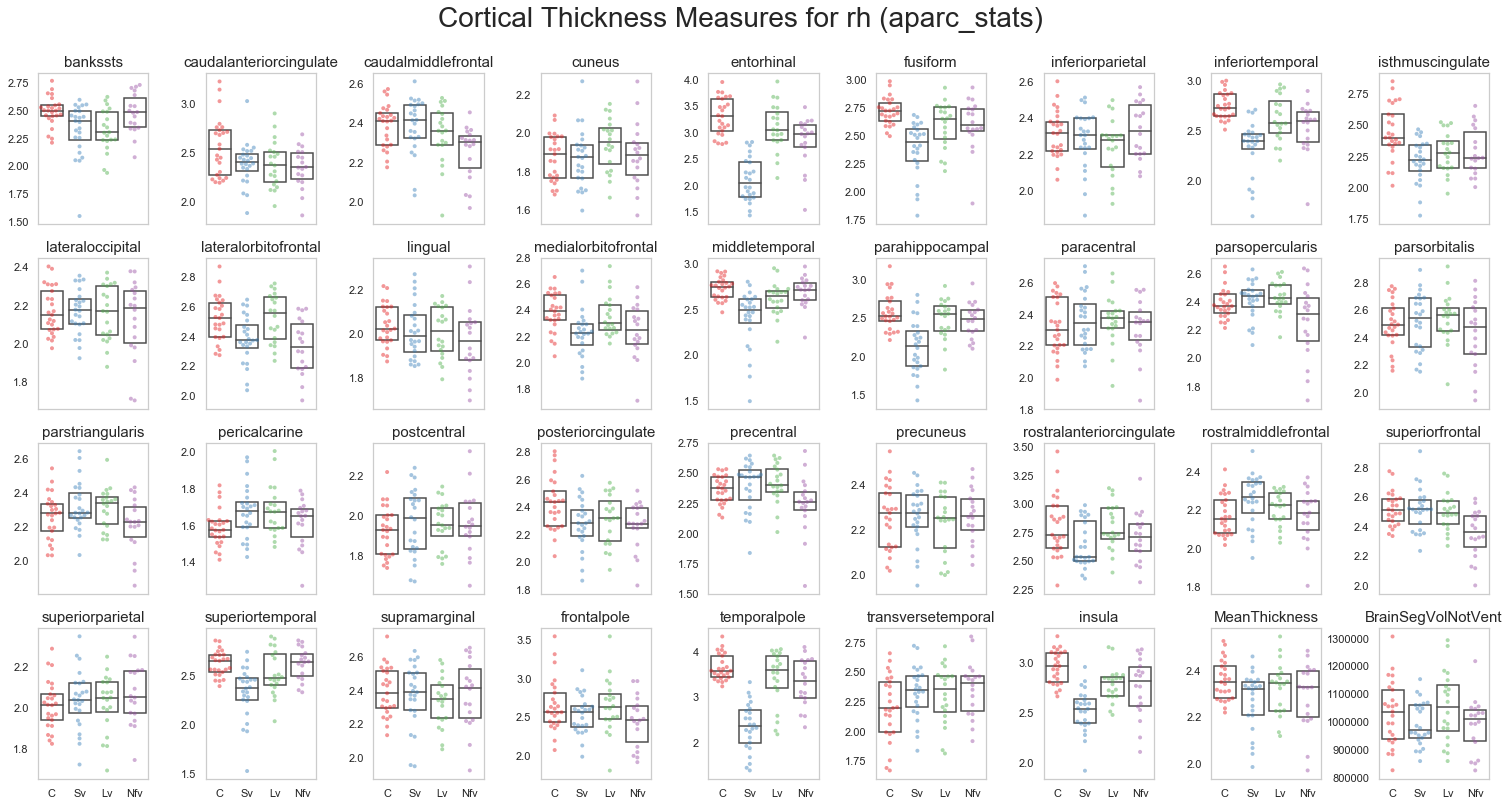

In [17]:
flatui = ["grey", "peru", "palevioletred"]

hemi = ['aseg', 'lh', 'rh']

for tab in hemi:
    print(tab)
    # hemisphere
    if tab == 'aseg':
        selectiontitle = 'Subcortical Thickness Measures (aseg_stats)'
        statspathway = '/autofs/cluster/animal/users/rezzo/PPA/SvPPA/analyses/PPA_aseg_vol_Sv_Lv_Nv_CN.txt'
        rows= 6
        cols= 11
        spacing = .4
    else:
        statspathway = '/autofs/cluster/animal/users/rezzo/PPA/SvPPA/analyses/PPA_aparc_'+tab+'_thickness_Sv_Lv_Nv_CN.txt'
        rows= 4
        cols= 9
        spacing = .22
        selectiontitle = 'Cortical Thickness Measures for '+tab+' (aparc_stats)'

    # import dataset
    df = pd.read_csv(statspathway, index_col=0, sep='\t')
    #df2 = pd.read_csv('/autofs/cluster/animal/users/rezzo/PPA/PPA_baseline/analyses/demographics', sep='\t', index_col=0) #, names=colnames
    df2 = pd.read_csv('/autofs/cluster/animal/users/rezzo/PPA/SvPPA/analyses/demographics.csv', index_col=0) #, names=colnames

    
    # concatenate dataframes
    df_final = df.join(df2)

    if tab == 'aseg':
        df_final.to_csv('/autofs/cluster/animal/users/rezzo/PPA/SvPPA/analyses/PPA_aseg_stats.csv')
    elif (tab == 'lh'):
        df_final.to_csv('/autofs/cluster/animal/users/rezzo/PPA/SvPPA/analyses/PPA_aparc_lh_stats.csv')
    elif (tab == 'rh'):
        df_final.to_csv('/autofs/cluster/animal/users/rezzo/PPA/SvPPA/analyses/PPA_aparc_rh_stats.csv')

    rois = list(df_final)[:-1]
    print(len(rois))

    if tab == 'aseg':
        trunc_aseg = makenames(rois)
    # make a list from last row indices
    lastrow = parserow(rows, cols, rois)

    fig = plt.figure(figsize=(26, 13))
    fig.subplots_adjust(hspace=spacing, wspace=.52)
    ttl = fig.suptitle(selectiontitle, fontsize=28)
    ttl.set_position([.5, .95])
    counter = 1
    for i in rois:
        if tab == 'aseg':
            shortname = trunc_aseg[counter-1]
            print(shortname)
        else:
            try:
                shortname = re.search(tab+'_'+'(.*?)'+'_thickness', i).group(1)
            except AttributeError:
                shortname = i
        try: 
            sns.set(style="whitegrid")
            ax = plt.subplot(rows, cols, counter)
            ax = sns.boxplot(x= 'Group', y=i, data=df_final, showcaps=False, boxprops={'facecolor':'None'}, showfliers=False, whiskerprops={'linewidth':0})
            ax2 = sns.swarmplot(x= 'Group', y=i, hue='Group', data=df_final, palette="Set1", alpha=0.45, s=4) #alpha=0.7
            ax2.set_ylabel('')
            ax2.set_xlabel('')
            ax2.axes.set_title(shortname, fontsize=15)
            ax2.legend_.remove()
            ax2.grid(False)
            if i not in lastrow:
                ax2.set_xticklabels([])
    #           if (i == rois[35]) or (i == rois[36]):
    #               ax.ticklabel_format(style='plain', axis='y')
            counter = counter + 1
        except ValueError:
            print('there is no graph '+i+' to print for this block '+str(counter))
    plt.savefig('/autofs/cluster/animal/users/rezzo/PPA/SvPPA/analyses/figures/'+tab+'boxswarmplot.png')

In [124]:
def make_wm_names(rois):
    trunc_aseg = list(rois)
    trunc_aseg[0] = 'lh-bankssts'
    trunc_aseg[1] = 'lh-caudalant-cing'
    trunc_aseg[2] = 'lh-caudalmid-front'
    trunc_aseg[3] = 'lh-cuneus'
    trunc_aseg[4] = 'lh-entorhinal'
    trunc_aseg[5] = 'lh-fusiform'
    trunc_aseg[6] = 'lh-inf-par'
    trunc_aseg[7] = 'lh-inf-temp'
    trunc_aseg[8] = 'lh-isthmuscing'
    trunc_aseg[9] = 'lh-lat-occ'
    trunc_aseg[10] = 'lh-lat-orb-front'
    trunc_aseg[11] = 'lh-lingual'
    trunc_aseg[12] = 'lh-med-orb-front'
    trunc_aseg[13] = 'lh-mid-temp'
    trunc_aseg[14] = 'lh-parahipp'
    trunc_aseg[15] = 'lh-paracentral'
    trunc_aseg[16] = 'lh-parsopercularis'
    trunc_aseg[17] = 'lh-parsorbitalis'
    trunc_aseg[18] = 'lh-parstriang'
    trunc_aseg[19] = 'lh-perical'
    trunc_aseg[20] = 'lh-postcentral'
    trunc_aseg[21] = 'lh-post-cing'
    trunc_aseg[22] = 'lh-precentral'
    trunc_aseg[23] = 'lh-precuneus'
    trunc_aseg[24] = 'lh-rost-ant-cing'
    trunc_aseg[25] =  'lh-rost-mid-front'
    trunc_aseg[26] =  'lh-sup-front'
    trunc_aseg[27] =  'lh-sup-par'
    trunc_aseg[28] =  'lh-sup-temp'
    trunc_aseg[29] =  'lh-supramarg'
    trunc_aseg[30] =  'lh-frontalpole'
    trunc_aseg[31] =  'lh-temporalpole'
    trunc_aseg[32] =  'lh-transv-temp'
    trunc_aseg[33] =  'lh-insula'
    trunc_aseg[34] =  'lh-unseg-wm'
    trunc_aseg[35] =  'lhCereb-wm-vol'
    trunc_aseg[36] =  'rhCereb-wm-Vol'
    trunc_aseg[37] =  'Cereb-wm-Vol'
    trunc_aseg[38] =  'MaskVol'
    trunc_aseg[39] =  'Est-TotalVol'
    #trunc_aseg[40] =  'Group'
    return trunc_aseg

In [114]:
def make_wm_names(rois):
    return trunc_aseg

40
lh-bankssts
lh-caudalant-cing
lh-caudalmid-front
lh-cuneus
lh-entorhinal
lh-fusiform
lh-inf-par
lh-inf-temp
lh-isthmuscing
lh-lat-occ
lh-lat-orb-front
lh-lingual
lh-med-orb-front
lh-mid-temp
lh-parahipp
lh-paracentral
lh-parsopercularis
lh-parsorbitalis
lh-parstriang
lh-perical
lh-postcentral
lh-post-cing
lh-precentral
lh-precuneus
lh-rost-ant-cing
lh-rost-mid-front
lh-sup-front
lh-sup-par
lh-sup-temp
lh-supramarg
lh-frontalpole
lh-temporalpole
lh-transv-temp
lh-insula
lh-unseg-wm
lhCereb-wm-vol
rhCereb-wm-Vol
Cereb-wm-Vol
MaskVol
Est-TotalVol


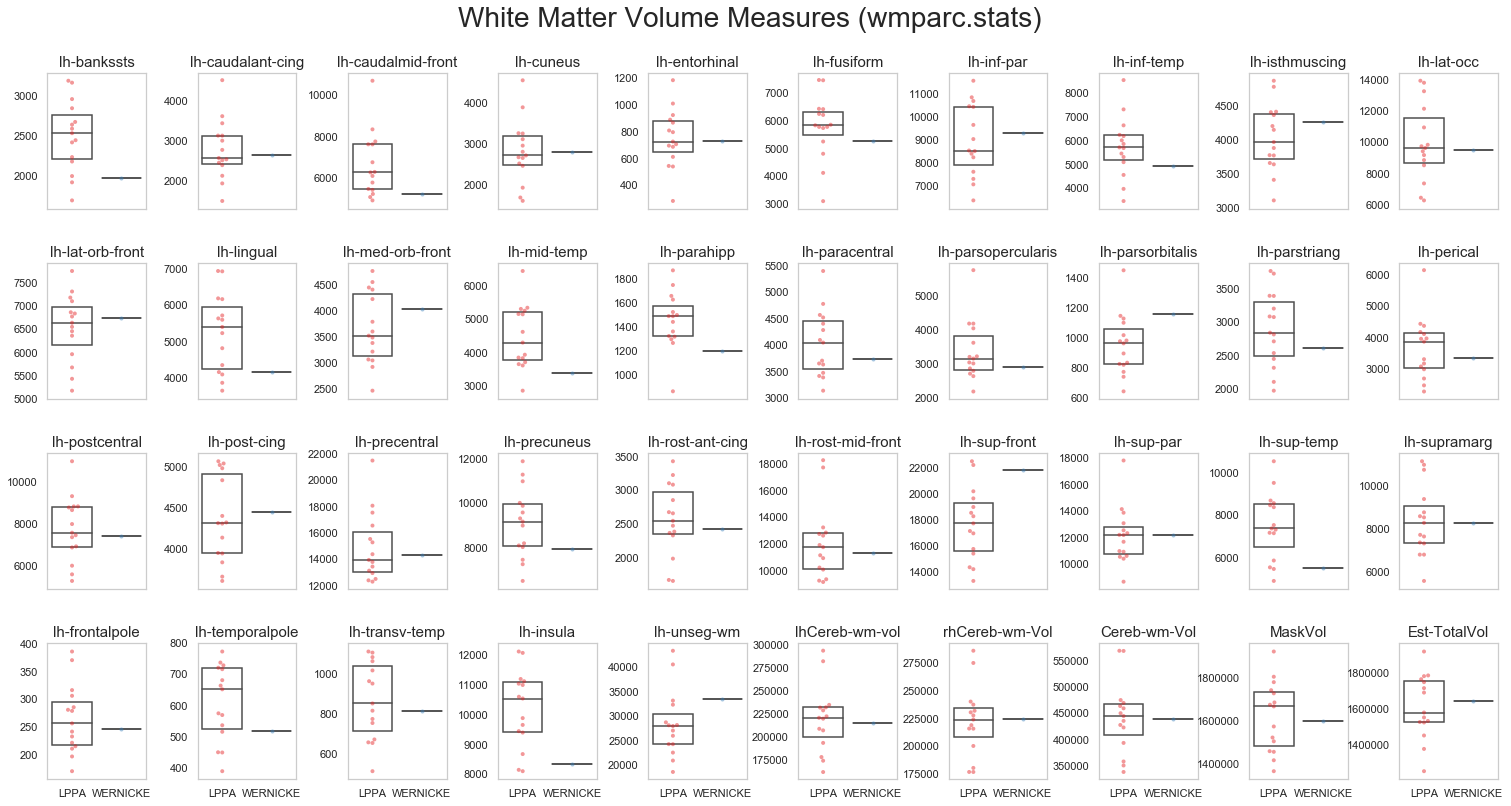

In [127]:
# WM ANALYSIS!!!
#### IMPORTANT !!! THIS USES A 0.5 THRESHOLD(does it?) -- UNLIKE THE OTHERS

# asegstats2table --subjectsfile=SUBJECTSFILE --stats wmparc.stats --meas volume --tablefile /autofs/cluster/animal/users/rezzo/PPA/LvPPA/lvPPA_baseline/analyses_atypical_lvPPA_vs_lvPPA/wmparc.stats.volume.txt

flatui = ["grey", "peru", "palevioletred"]

tab = 'wm'

if tab == 'wm':
    selectiontitle = 'White Matter Volume Measures (wmparc.stats)'
    statspathway = '/autofs/cluster/animal/users/rezzo/PPA/LvPPA/lvPPA_baseline/analyses_atypical_lvPPA_vs_lvPPA/wmparc_stats_volume_lh_only.txt'
    rows= 4
    cols= 10
    spacing = .4

    # import dataset
    df = pd.read_csv(statspathway, index_col=0, sep='\t')
    #df2 = pd.read_csv('/autofs/cluster/animal/users/rezzo/PPA/PPA_baseline/analyses/demographics', sep='\t', index_col=0) #, names=colnames
    df2 = pd.read_csv('/autofs/cluster/animal/users/rezzo/PPA/LvPPA/lvPPA_baseline/analyses_atypical_lvPPA_vs_lvPPA/demographics.csv', index_col=0) #, names=colnames

    # concatenate dataframes
    df_final = df.join(df2)

    df_final.to_csv('/autofs/cluster/animal/users/rezzo/PPA/LvPPA/lvPPA_baseline/analyses_atypical_lvPPA_vs_lvPPA/WM_VOL_stats.csv')

    rois = list(df_final)[:-1]
    print(len(rois))

    if tab == 'wm':
        trunc_aseg = make_wm_names(rois)
    # make a list from last row indices
    lastrow = parserow(rows, cols, rois)

    fig = plt.figure(figsize=(26, 13))
    fig.subplots_adjust(hspace=spacing, wspace=.52)
    ttl = fig.suptitle(selectiontitle, fontsize=28)
    ttl.set_position([.5, .95])
    counter = 1
    for i in rois:
        if tab == 'wm':
            shortname = trunc_aseg[counter-1]
            print(shortname)
        else:
            try:
                shortname = re.search(tab+'_'+'(.*?)'+'_volume', i).group(1)
            except AttributeError:
                shortname = i
        try: 
            sns.set(style="whitegrid")
            ax = plt.subplot(rows, cols, counter)
            ax = sns.boxplot(x= 'Group', y=i, data=df_final, whis=1.5, showcaps=False, boxprops={'facecolor':'None'}, showfliers=False, whiskerprops={'linewidth':0})
            ax2 = sns.swarmplot(x= 'Group', y=i, hue='Group', data=df_final, palette="Set1", alpha=0.45, s=4) #alpha=0.7
            ax2.set_ylabel('')
            ax2.set_xlabel('')
            ax2.axes.set_title(shortname, fontsize=15)
            ax2.legend_.remove()
            ax2.grid(False)
            if i not in lastrow:
                ax2.set_xticklabels([])
    #           if (i == rois[35]) or (i == rois[36]):
    #               ax.ticklabel_format(style='plain', axis='y')
            counter = counter + 1
        except ValueError:
            print('there is no graph '+i+' to print for this block '+str(counter))
    plt.savefig('/autofs/cluster/animal/users/rezzo/PPA/LvPPA/lvPPA_baseline/analyses_atypical_lvPPA_vs_lvPPA/figures/'+tab+'boxswarmplot.png')

In [347]:
import matplotlib.pyplot as plt 
import numpy as np    

def abline(slope, intercept):
    #"""Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

,wm-lh-bankssts,wm-lh-caudalanteriorcingulate,wm-lh-caudalmiddlefrontal,wm-lh-cuneus,wm-lh-entorhinal,wm-lh-fusiform,wm-lh-inferiorparietal,wm-lh-inferiortemporal,wm-lh-isthmuscingulate,wm-lh-lateraloccipital,wm-lh-lateralorbitofrontal,wm-lh-lingual,wm-lh-medialorbitofrontal,wm-lh-middletemporal,wm-lh-parahippocampal,wm-lh-paracentral,wm-lh-parsopercularis,wm-lh-parsorbitalis,wm-lh-parstriangularis,wm-lh-pericalcarine,wm-lh-postcentral,wm-lh-posteriorcingulate,wm-lh-precentral,wm-lh-precuneus,wm-lh-rostralanteriorcingulate,wm-lh-rostralmiddlefrontal,wm-lh-superiorfrontal,wm-lh-superiorparietal,wm-lh-superiortemporal,wm-lh-supramarginal,wm-lh-frontalpole,wm-lh-temporalpole,wm-lh-transversetemporal,wm-lh-insula,Left-UnsegmentedWhiteMatter,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,MaskVol,EstimatedTotalIntraCranialVol
Measure:volume,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VASB_M_39_20090622,0.844508,1.068754,0.793322,1.115274,1.003025,1.020069,1.154698,1.037700,1.027957,0.998549,1.026392,0.844616,1.005132,0.743690,0.911503,0.999949,0.904564,1.158462,0.932397,0.996629,1.049038,1.047077,1.017084,1.026328,1.070637,1.051807,1.239685,1.091848,0.790568,1.029823,0.799854,0.892748,1.151668,0.974633,1.389232,1.063355,1.084533,1.075384,1.073116,1.068493
VASB_M_39_20100923,0.872045,1.124318,0.832094,1.151575,0.948999,1.016228,1.092300,0.960113,1.010145,1.025371,1.006721,0.866401,1.207151,0.733692,0.873510,1.006642,0.880727,1.145966,0.948206,1.065459,1.046726,1.142611,1.073729,1.006109,1.008578,1.013305,1.241929,1.096643,0.792978,1.042082,0.796195,0.946222,1.166290,0.894850,1.369360,1.059385,1.071870,1.067025,1.072396,1.070877
VASB_M_39_20110201,0.828905,1.198324,0.819743,1.112895,0.891948,0.976231,1.130246,0.992346,1.051873,1.053217,1.010735,0.885155,1.173864,0.729332,0.863107,0.947868,0.942119,1.248519,0.881401,0.971051,1.031734,1.095559,1.043579,0.974446,1.005294,1.018450,1.200188,1.089036,0.730695,1.040205,0.822173,0.831048,1.197262,0.905794,1.329970,1.041666,1.070192,1.057373,1.077414,1.105331
VASB_M_39_20131231,0.800093,1.106839,0.798329,1.092687,0.791719,0.856742,1.073762,0.882442,1.037633,0.971946,0.984641,0.790797,0.991210,0.655622,0.846645,0.987461,0.894828,1.148443,0.861917,1.030997,1.045605,1.072970,1.045175,0.967015,0.992243,1.009449,1.213021,1.083688,0.713790,0.990135,0.869374,0.754113,1.123754,0.915180,1.164667,0.994293,1.025720,1.011403,1.047278,1.108449
VASB_M_39_20141121,0.763711,1.057449,0.790306,1.130359,0.764497,0.825917,1.110030,0.827414,1.109300,0.992827,1.002662,0.788808,1.146985,0.636340,0.792322,0.960946,0.861138,1.248627,0.904178,1.046653,1.028149,1.097137,1.022085,0.945033,1.050368,1.013466,1.215450,1.049145,0.680891,0.993275,0.901939,0.792505,1.083079,0.855194,1.145561,0.984953,1.013212,1.000454,1.071723,1.116005


In [413]:
# Create histograms of WM (VASB OVERTIME)
# maybe somehow change the y axis to be proportionate to the size of average roi?
# normalize by taking "what percent of VASB value --> MEDIAN". Now just dividing.

statspathway = '/autofs/cluster/animal/users/rezzo/PPA/LvPPA/lvPPA_baseline/analyses_atypical_lvPPA_vs_lvPPA/WM_VOL_stats_VASB_lh_only.txt'
df = pd.read_csv(statspathway, index_col=0, sep='\t')

# import dataset
df = pd.read_csv(statspathway, index_col=0, sep='\t')

# import lvppa dataset
lvppa_path = '/autofs/cluster/animal/users/rezzo/PPA/LvPPA/lvPPA_baseline/analyses_lvPPA_CN/wmparc_vol_lvppa_table_lh.txt'
lvppa_df = pd.read_csv(lvppa_path,index_col=0, sep='\t')

# long lvppa
long_lvppa = '/autofs/cluster/animal/users/rezzo/PPA/LvPPA/long_wm_VASB_vs_LVPPA/wmparc_lvppa_vol_lh_only.txt'
lvppa_long_df = pd.read_csv(long_lvppa,index_col=0, sep='\t')
#####

allcontrol_wm = '/autofs/cluster/animal/users/rezzo/PPA/LvPPA/lvPPA_baseline/analyses_lvPPA_CN/wmparc_vol_controls_table_lh.txt'
ALLCONTROLS = pd.read_csv(allcontrol_wm, index_col=0, sep='\t')
ALLCONTROLS

# Get rid of outliers
CONTROLS_NO_OUTLIERS = ALLCONTROLS[~((ALLCONTROLS-ALLCONTROLS.mean()).abs() > 3*ALLCONTROLS.std())]
CONTROLS_NO_OUTLIERS

# Get median of each column
MEDIAN_CONTROLS = CONTROLS_NO_OUTLIERS.median()
MEAN_CONTROLS = CONTROLS_NO_OUTLIERS.mean()

MEDIAN_CONTROLS # (divide the later values of VASB by these controls to have subplots whose slopes are comparable)
# Here, values > 1 mean that VASB has more volume than controls. Values < 1 mean that VASB has less volume than controls.

# turn into dataframe & transpose
MEDIAN_CONTROLS = pd.Series.to_frame(MEDIAN_CONTROLS)
MEAN_CONTROLS = pd.Series.to_frame(MEAN_CONTROLS)
MEDIAN_CN_TRANSPOSED = MEDIAN_CONTROLS.T
MEAN_CN_TRANSPOSED = MEAN_CONTROLS.T
MEDIAN_CN_TRANSPOSED

# divide df by the MEDIAN
derivative = df/MEAN_CN_TRANSPOSED.values[0,:]
derivative_lvppa = lvppa_long_df/MEAN_CN_TRANSPOSED.values[0,:]
derivativelist = [derivative,derivative_lvppa]
# vertically concatenate dataframes
combined_csv = pd.concat(derivativelist, sort=False)
#####

In [419]:
MEAN_CN_TRANSPOSED

,wm-lh-bankssts,wm-lh-caudalanteriorcingulate,wm-lh-caudalmiddlefrontal,wm-lh-cuneus,wm-lh-entorhinal,wm-lh-fusiform,wm-lh-inferiorparietal,wm-lh-inferiortemporal,wm-lh-isthmuscingulate,wm-lh-lateraloccipital,wm-lh-lateralorbitofrontal,wm-lh-lingual,wm-lh-medialorbitofrontal,wm-lh-middletemporal,wm-lh-parahippocampal,wm-lh-paracentral,wm-lh-parsopercularis,wm-lh-parsorbitalis,wm-lh-parstriangularis,wm-lh-pericalcarine,wm-lh-postcentral,wm-lh-posteriorcingulate,wm-lh-precentral,wm-lh-precuneus,wm-lh-rostralanteriorcingulate,wm-lh-rostralmiddlefrontal,wm-lh-superiorfrontal,wm-lh-superiorparietal,wm-lh-superiortemporal,wm-lh-supramarginal,wm-lh-frontalpole,wm-lh-temporalpole,wm-lh-transversetemporal,wm-lh-insula,Left-UnsegmentedWhiteMatter,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,MaskVol,EstimatedTotalIntraCranialVol
0,2606.352,2524.748,6393.156,2580.508,995.456,6454.48,9112.904,6013.256,3843.476,9599.424,6497.896,5309.15,3579.552,5212.844,1533.74,3863.248,3407.692,1032.436,2994.396,3183.076,7167.5125,4206.288,13409.74,8715.664,2350.366667,11599.508,17650.624,11822.912,7935.768,8483.668,269.496,655.624,778.488,9779.0,30270.372,221943.970281,221114.193503,443058.163784,1526655.64,1.481895e+06


In [422]:
df

,wm-lh-bankssts,wm-lh-caudalanteriorcingulate,wm-lh-caudalmiddlefrontal,wm-lh-cuneus,wm-lh-entorhinal,wm-lh-fusiform,wm-lh-inferiorparietal,wm-lh-inferiortemporal,wm-lh-isthmuscingulate,wm-lh-lateraloccipital,wm-lh-lateralorbitofrontal,wm-lh-lingual,wm-lh-medialorbitofrontal,wm-lh-middletemporal,wm-lh-parahippocampal,wm-lh-paracentral,wm-lh-parsopercularis,wm-lh-parsorbitalis,wm-lh-parstriangularis,wm-lh-pericalcarine,wm-lh-postcentral,wm-lh-posteriorcingulate,wm-lh-precentral,wm-lh-precuneus,wm-lh-rostralanteriorcingulate,wm-lh-rostralmiddlefrontal,wm-lh-superiorfrontal,wm-lh-superiorparietal,wm-lh-superiortemporal,wm-lh-supramarginal,wm-lh-frontalpole,wm-lh-temporalpole,wm-lh-transversetemporal,wm-lh-insula,Left-UnsegmentedWhiteMatter,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,MaskVol,EstimatedTotalIntraCranialVol
Measure:volume,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VASB_M_39_20090622,2186.6,2665.9,5260.6,2765.1,961.7,6506.0,9704.2,6168.4,3941.6,9563.9,6903.0,4458.6,3545.0,3957.1,1384.3,3899.5,3066.2,1075.4,2689.5,3163.8,7578.3,4246.0,14276.4,8618.9,2477.4,11755.2,22256.8,12659.1,6430.4,8560.2,218.6,586.0,866.4,9501.6,40597.1,232306.552759,240479.229432,472785.782190,1604136,1.574366e+06
VASB_M_39_20100923,2257.9,2804.5,5517.7,2855.1,909.9,6481.5,9179.8,5707.2,3873.3,9820.8,6770.7,4573.6,4257.5,3903.9,1326.6,3925.6,2985.4,1063.8,2735.1,3382.3,7561.6,4633.4,15071.5,8449.1,2333.8,11324.9,22297.1,12714.7,6450.0,8662.1,217.6,621.1,877.4,8723.8,40016.4,231439.197528,237671.568463,469110.765990,1603061,1.577879e+06
VASB_M_39_20110201,2146.2,2989.1,5435.8,2759.2,855.2,6226.4,9498.7,5898.8,4033.3,10087.5,6797.7,4672.6,4140.1,3880.7,1310.8,3696.4,3193.5,1159.0,2542.4,3082.6,7453.3,4442.6,14648.3,8183.2,2326.2,11382.4,21547.7,12626.5,5943.4,8646.5,224.7,545.5,900.7,8830.5,38865.3,227568.198740,237299.455639,464867.654379,1610562,1.628645e+06
VASB_M_39_20131231,2071.6,2760.9,5293.8,2709.1,759.1,5464.3,9024.0,5245.5,3978.7,9309.1,6622.2,4174.5,3495.9,3488.5,1285.8,3850.8,3033.2,1066.1,2486.2,3272.9,7553.5,4351.0,14670.7,8120.8,2296.0,11281.8,21778.1,12564.5,5805.9,8230.3,237.6,495.0,845.4,8922.0,34034.7,217218.802826,227438.354320,444657.157146,1565513,1.633239e+06
VASB_M_39_20141121,1977.4,2637.7,5240.6,2802.5,733.0,5267.7,9328.8,4918.4,4253.5,9509.1,6743.4,4164.0,4045.3,3385.9,1203.3,3747.4,2919.0,1159.1,2608.1,3322.6,7427.4,4449.0,14346.6,7936.2,2430.5,11326.7,21821.7,12164.0,5538.3,8256.4,246.5,520.2,814.8,8337.2,33476.4,215178.371647,224665.000737,439843.372384,1602055,1.644372e+06


In [423]:
lvppa_long_df

,wm-lh-bankssts,wm-lh-caudalanteriorcingulate,wm-lh-caudalmiddlefrontal,wm-lh-cuneus,wm-lh-entorhinal,wm-lh-fusiform,wm-lh-inferiorparietal,wm-lh-inferiortemporal,wm-lh-isthmuscingulate,wm-lh-lateraloccipital,wm-lh-lateralorbitofrontal,wm-lh-lingual,wm-lh-medialorbitofrontal,wm-lh-middletemporal,wm-lh-parahippocampal,wm-lh-paracentral,wm-lh-parsopercularis,wm-lh-parsorbitalis,wm-lh-parstriangularis,wm-lh-pericalcarine,wm-lh-postcentral,wm-lh-posteriorcingulate,wm-lh-precentral,wm-lh-precuneus,wm-lh-rostralanteriorcingulate,wm-lh-rostralmiddlefrontal,wm-lh-superiorfrontal,wm-lh-superiorparietal,wm-lh-superiortemporal,wm-lh-supramarginal,wm-lh-frontalpole,wm-lh-temporalpole,wm-lh-transversetemporal,wm-lh-insula,Left-UnsegmentedWhiteMatter,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,MaskVol,EstimatedTotalIntraCranialVol
Measure:volume,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
JMCC_M_44_20151020,3522.3,3076.9,8758.0,4539.3,1054.0,7630.8,12413.4,8186.2,5524.9,15852.1,9067.1,6533.2,4252.0,7544.2,1922.8,4892.1,4354.7,1665.2,3516.7,4709.3,12769.4,5633.5,20507.5,11136.9,3837.3,15887.3,24547.2,14614.3,13389.9,16714.8,403.4,772.5,1168.8,14245.9,36683.9,309081.802880,305919.291161,615001.094041,1955717,2.038398e+06
JMCC_M_44_20151103,3613.6,2950.4,8273.2,3124.4,869.4,6936.1,14038.4,7074.2,5592.9,12001.2,8238.0,6620.1,4972.3,6996.9,1974.2,4785.0,4403.9,1379.6,3485.1,4078.2,11390.7,5667.4,18641.3,10426.3,3567.7,14962.5,22618.9,14575.4,11149.3,11664.4,210.4,716.9,1005.0,11881.5,34626.7,0.000000,0.000000,0.000000,2017090,2.043686e+06
JMCC_M_44_20170524,3191.6,3150.5,8616.2,3961.4,966.0,6470.6,11597.7,6908.1,5675.1,13448.8,8298.2,6135.6,4018.8,6102.4,1965.6,4949.7,4268.3,1712.8,3305.4,3825.3,12324.8,5743.6,19574.5,10506.7,3855.9,14526.1,24461.4,13952.2,11998.3,15728.7,356.7,589.1,1119.2,13910.5,35241.5,290096.104453,295086.097630,585182.202083,2021673,2.044667e+06
JMCC_M_44_20180718,2826.7,1116.7,6165.3,2317.4,767.2,5069.9,9080.5,4548.0,2629.8,10734.7,5472.6,3969.4,4291.4,5129.5,1415.7,3160.6,3040.8,1075.9,2727.2,2141.7,9363.8,2551.7,15058.0,6931.5,1044.7,10782.1,15961.1,9364.5,9102.4,9983.8,279.5,801.5,988.8,9475.0,13386.9,189602.597182,163129.057016,352731.654198,1178989,1.141228e+06
PNIC_F_46_20170728,3158.4,2574.8,5489.0,2955.1,686.5,5780.5,10452.4,6196.5,3636.8,9737.7,6552.3,5396.2,3386.5,4623.7,1319.6,4098.5,4188.5,1147.8,3391.8,3299.6,7575.8,3837.4,13139.7,11303.4,2372.1,10128.3,15422.8,13879.1,7324.1,9389.1,256.9,450.6,1109.0,10606.1,28198.8,220910.153550,224068.434003,444978.587553,1523077,1.535263e+06
PNIC_F_46_20181016,2974.9,2524.0,5402.0,2555.2,607.7,5033.4,9102.4,5988.9,3565.9,8460.4,6097.3,4404.2,3392.7,4155.4,1083.9,4244.3,3916.4,1089.8,3138.1,2684.6,7068.2,3758.8,12414.0,10402.0,2322.5,9113.6,14379.5,12763.2,7057.0,8718.9,228.5,504.6,1098.5,10211.3,23418.8,198864.417156,218103.291267,416967.708423,1461703,1.542621e+06


In [420]:
derivative

,wm-lh-bankssts,wm-lh-caudalanteriorcingulate,wm-lh-caudalmiddlefrontal,wm-lh-cuneus,wm-lh-entorhinal,wm-lh-fusiform,wm-lh-inferiorparietal,wm-lh-inferiortemporal,wm-lh-isthmuscingulate,wm-lh-lateraloccipital,wm-lh-lateralorbitofrontal,wm-lh-lingual,wm-lh-medialorbitofrontal,wm-lh-middletemporal,wm-lh-parahippocampal,wm-lh-paracentral,wm-lh-parsopercularis,wm-lh-parsorbitalis,wm-lh-parstriangularis,wm-lh-pericalcarine,wm-lh-postcentral,wm-lh-posteriorcingulate,wm-lh-precentral,wm-lh-precuneus,wm-lh-rostralanteriorcingulate,wm-lh-rostralmiddlefrontal,wm-lh-superiorfrontal,wm-lh-superiorparietal,wm-lh-superiortemporal,wm-lh-supramarginal,wm-lh-frontalpole,wm-lh-temporalpole,wm-lh-transversetemporal,wm-lh-insula,Left-UnsegmentedWhiteMatter,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,MaskVol,EstimatedTotalIntraCranialVol
Measure:volume,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VASB_M_39_20090622,0.838950,1.055907,0.822849,1.071533,0.966090,1.007982,1.064886,1.025800,1.025530,0.996299,1.062344,0.839795,0.990347,0.759106,0.902565,1.009384,0.899788,1.041614,0.898178,0.993944,1.057312,1.009441,1.064629,0.988898,1.054048,1.013422,1.260964,1.070726,0.810306,1.009021,0.811144,0.893805,1.112927,0.971633,1.341150,1.046690,1.087579,1.067096,1.050752,1.062401
VASB_M_39_20100923,0.866307,1.110804,0.863064,1.106410,0.914053,1.004186,1.007341,0.949103,1.007760,1.023061,1.041983,0.861456,1.189395,0.748900,0.864945,1.016140,0.876077,1.030379,0.913406,1.062589,1.054982,1.101541,1.123922,0.969416,0.992951,0.976326,1.263247,1.075429,0.812776,1.021032,0.807433,0.947342,1.127057,0.892095,1.321966,1.042782,1.074882,1.058802,1.050048,1.064771
VASB_M_39_20110201,0.823450,1.183920,0.850253,1.069247,0.859104,0.964663,1.042335,0.980966,1.049389,1.050844,1.046139,0.880103,1.156597,0.744450,0.854643,0.956811,0.937145,1.122588,0.849053,0.968434,1.039873,1.056181,1.092363,0.938907,0.989718,0.981283,1.220790,1.067969,0.748938,1.019194,0.833779,0.832032,1.156986,0.903006,1.283939,1.025341,1.073199,1.049225,1.054961,1.099029
VASB_M_39_20131231,0.794827,1.093535,0.828042,1.049832,0.762565,0.846590,0.990244,0.872323,1.035183,0.969756,1.019130,0.786284,0.976631,0.669212,0.838343,0.996778,0.890104,1.032606,0.830284,1.028219,1.053852,1.034404,1.094033,0.931748,0.976869,0.972610,1.233843,1.062725,0.731612,0.970135,0.881646,0.755006,1.085951,0.912363,1.124357,0.978710,1.028601,1.003609,1.025453,1.102129
VASB_M_39_20141121,0.758685,1.044738,0.819720,1.086026,0.736346,0.816131,1.023691,0.817926,1.106681,0.990591,1.037782,0.784306,1.130113,0.649530,0.784553,0.970013,0.856591,1.122685,0.870994,1.043833,1.036259,1.057702,1.069864,0.910567,1.034094,0.976481,1.236313,1.028850,0.697891,0.973211,0.914670,0.793443,1.046644,0.852562,1.105913,0.969517,1.016059,0.992744,1.049389,1.109642


40
lh-bankssts
lh-caudalant-cing
lh-caudalmid-front
lh-cuneus
lh-entorhinal
lh-fusiform
lh-inf-par
lh-inf-temp
lh-isthmuscing
lh-lat-occ
lh-lat-orb-front
lh-lingual
lh-med-orb-front
lh-mid-temp
lh-parahipp
lh-paracentral
lh-parsopercularis
lh-parsorbitalis
lh-parstriang
lh-perical
lh-postcentral
lh-post-cing
lh-precentral
lh-precuneus
lh-rost-ant-cing
lh-rost-mid-front
lh-sup-front
lh-sup-par
lh-sup-temp
lh-supramarg
lh-frontalpole
lh-temporalpole
lh-transv-temp
lh-insula
lh-unseg-wm
lhCereb-wm-vol
rhCereb-wm-Vol
Cereb-wm-Vol
MaskVol
Est-TotalVol


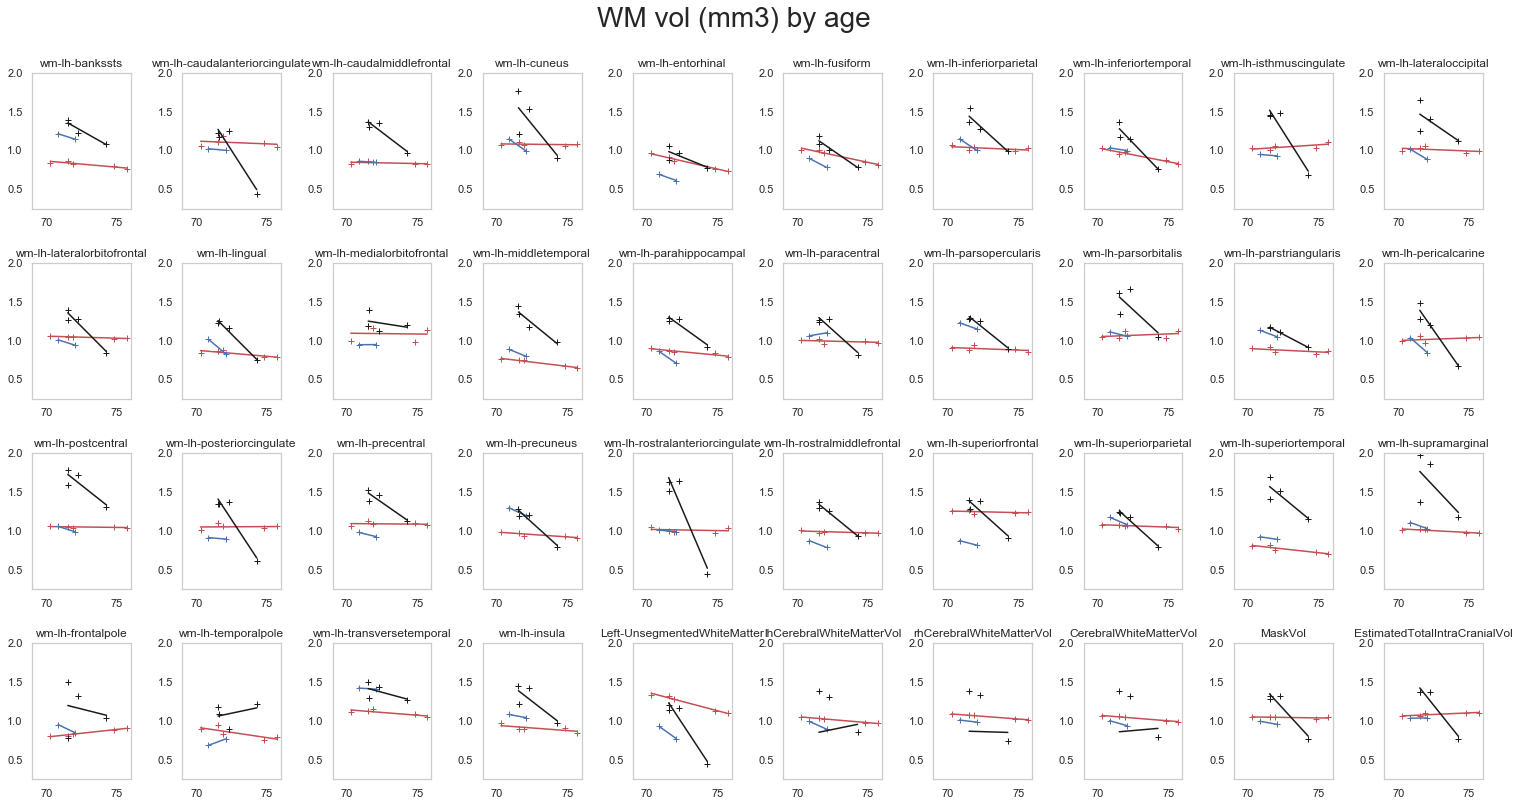

In [417]:
#df2 = pd.read_csv('/autofs/cluster/animal/users/rezzo/PPA/LvPPA/long_wm_VASB_vs_LVPPA/demographics_long.csv')
#df2 = pd.read_csv('/autofs/cluster/animal/users/rezzo/PPA/LvPPA/lvPPA_baseline/analyses_atypical_lvPPA_vs_lvPPA/demographics.csv',index_col=0) #, names=colnames
df2 = pd.read_csv('/autofs/cluster/animal/users/rezzo/PPA/LvPPA/lvPPA_baseline/analyses_atypical_lvPPA_vs_lvPPA/dem_compare.csv', index_col=0) #, names=colnames

# concatenate dataframes
df_final = combined_csv.join(df2)

df_final.to_csv('/autofs/cluster/animal/users/rezzo/PPA/LvPPA/lvPPA_baseline/analyses_atypical_lvPPA_vs_lvPPA/WM_VOL_stats_VASB.csv')

VASB_df_final = df_final[df_final['Group'] == 'VASB']
PNIC_df_final = df_final[df_final['Group'] == 'PNIC']
JMCC_df_final = df_final[df_final['Group'] == 'JMCC']

rois = list(df_final)[:-2]
print(len(rois))

# MAKE THREE DIFFERENT DATAFRAMES (ONE FOR EACH SUBJECT AND ADD AX1 , AX2, AX3)

# figure title
selectiontitle = 'WM vol (mm3) by age'
fig = plt.figure(figsize=(26, 13))
fig.subplots_adjust(hspace=spacing, wspace=.52)
ttl = fig.suptitle(selectiontitle, fontsize=28)
ttl.set_position([.5, .95])

trunc_aseg = make_wm_names(rois)
# make a list from last row indices
lastrow = parserow(rows, cols, rois)

counter = 1
for i in rois:
    
    shortname = trunc_aseg[counter-1]
    print(shortname)
    
    time_points_VASB = np.asarray(VASB_df_final['Age'].tolist())
    time_values_VASB = np.asarray(VASB_df_final[i].tolist())
    VASB_slope, VASB_intercept, VASB_r_value, VASB_p_value, VASB_std_err = stats.linregress(time_points_VASB,time_values_VASB)
    VASB_line = VASB_slope*time_points_VASB+VASB_intercept
    
    time_points_PNIC = np.asarray(PNIC_df_final['Age'].tolist())
    time_values_PNIC = np.asarray(PNIC_df_final[i].tolist())
    PNIC_slope, PNIC_intercept, PNIC_r_value, PNIC_p_value, PNIC_std_err = stats.linregress(time_points_PNIC,time_values_PNIC)
    PNIC_line = PNIC_slope*time_points_PNIC+PNIC_intercept
    
    time_points_JMCC = np.asarray(JMCC_df_final['Age'].tolist())
    time_values_JMCC = np.asarray(JMCC_df_final[i].tolist())
    JMCC_slope, JMCC_intercept, JMCC_r_value, JMCC_p_value, JMCC_std_err = stats.linregress(time_points_JMCC,time_values_JMCC)
    JMCC_line = JMCC_slope*time_points_JMCC+JMCC_intercept
    
    total_time_points = [time_points_VASB,time_points_PNIC,time_points_JMCC]
    total_time_values = [time_values_VASB,time_values_PNIC,time_values_JMCC]
    
    try: 
        ax = plt.subplot(rows, cols, counter)
        ax = plt.plot(time_points_VASB,time_values_VASB, '+r', time_points_VASB, VASB_line, 'r-', time_points_PNIC,time_values_PNIC, '+b', time_points_PNIC, PNIC_line, 'b-', time_points_JMCC,time_values_JMCC, '+k', time_points_JMCC, JMCC_line, 'k-')
        plt.grid(False)
        plt.gca().set_xlim([69, 76])
        plt.gca().set_ylim([0.25, 2])
        #plt.legend((line1, line2, line3), ('VASB', 'PNIC', 'JMCC'))
        #plt.gca().set_aspect('equal', adjustable='box')
        # add titles
        plt.title(i) 
        # plot slop = 1
        # add legend (later)
        #plt.legend([VASB_line,PNIC_line,JMCC_line], ['VASB', 'PNIC', 'JMCC'])

        counter = counter + 1
    except(ValueError):
        print('there is no graph '+i+' to print for this block '+str(counter))
        #plt.legend([time_values_VASB, time_values_PNIC, time_values_JMCC], ['VASB', 'PNIC','JMCC'], 'upper left')
plt.savefig('/autofs/cluster/animal/users/rezzo/PPA/LvPPA/lvPPA_baseline/analyses_atypical_lvPPA_vs_lvPPA/figures/VASB_VOL_by_AGE_lh_comparison.png')





In [364]:
t = np.arange(0., 5., 0.2)


array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8])

In [ ]:
df_final[rois[i]].tolist()

In [214]:
df_final

,wm-lh-bankssts,wm-lh-caudalanteriorcingulate,wm-lh-caudalmiddlefrontal,wm-lh-cuneus,wm-lh-entorhinal,wm-lh-fusiform,wm-lh-inferiorparietal,wm-lh-inferiortemporal,wm-lh-isthmuscingulate,wm-lh-lateraloccipital,wm-lh-lateralorbitofrontal,wm-lh-lingual,wm-lh-medialorbitofrontal,wm-lh-middletemporal,wm-lh-parahippocampal,wm-lh-paracentral,wm-lh-parsopercularis,wm-lh-parsorbitalis,wm-lh-parstriangularis,wm-lh-pericalcarine,wm-lh-postcentral,wm-lh-posteriorcingulate,wm-lh-precentral,wm-lh-precuneus,wm-lh-rostralanteriorcingulate,wm-lh-rostralmiddlefrontal,wm-lh-superiorfrontal,wm-lh-superiorparietal,wm-lh-superiortemporal,wm-lh-supramarginal,wm-lh-frontalpole,wm-lh-temporalpole,wm-lh-transversetemporal,wm-lh-insula,Left-UnsegmentedWhiteMatter,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,MaskVol,EstimatedTotalIntraCranialVol,Group
Measure:volume,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VASB_M_39_20090622,2186.6,2665.9,5260.6,2765.1,961.7,6506.0,9704.2,6168.4,3941.6,9563.9,6903.0,4458.6,3545.0,3957.1,1384.3,3899.5,3066.2,1075.4,2689.5,3163.8,7578.3,4246.0,14276.4,8618.9,2477.4,11755.2,22256.8,12659.1,6430.4,8560.2,218.6,586.0,866.4,9501.6,40597.1,232306.552759,240479.229432,472785.782190,1604136,1.574366e+06,2009
VASB_M_39_20100923,2257.9,2804.5,5517.7,2855.1,909.9,6481.5,9179.8,5707.2,3873.3,9820.8,6770.7,4573.6,4257.5,3903.9,1326.6,3925.6,2985.4,1063.8,2735.1,3382.3,7561.6,4633.4,15071.5,8449.1,2333.8,11324.9,22297.1,12714.7,6450.0,8662.1,217.6,621.1,877.4,8723.8,40016.4,231439.197528,237671.568463,469110.765990,1603061,1.577879e+06,2010
VASB_M_39_20110201,2146.2,2989.1,5435.8,2759.2,855.2,6226.4,9498.7,5898.8,4033.3,10087.5,6797.7,4672.6,4140.1,3880.7,1310.8,3696.4,3193.5,1159.0,2542.4,3082.6,7453.3,4442.6,14648.3,8183.2,2326.2,11382.4,21547.7,12626.5,5943.4,8646.5,224.7,545.5,900.7,8830.5,38865.3,227568.198740,237299.455639,464867.654379,1610562,1.628645e+06,2011
VASB_M_39_20131231,2071.6,2760.9,5293.8,2709.1,759.1,5464.3,9024.0,5245.5,3978.7,9309.1,6622.2,4174.5,3495.9,3488.5,1285.8,3850.8,3033.2,1066.1,2486.2,3272.9,7553.5,4351.0,14670.7,8120.8,2296.0,11281.8,21778.1,12564.5,5805.9,8230.3,237.6,495.0,845.4,8922.0,34034.7,217218.802826,227438.354320,444657.157146,1565513,1.633239e+06,2013
VASB_M_39_20141121,1977.4,2637.7,5240.6,2802.5,733.0,5267.7,9328.8,4918.4,4253.5,9509.1,6743.4,4164.0,4045.3,3385.9,1203.3,3747.4,2919.0,1159.1,2608.1,3322.6,7427.4,4449.0,14346.6,7936.2,2430.5,11326.7,21821.7,12164.0,5538.3,8256.4,246.5,520.2,814.8,8337.2,33476.4,215178.371647,224665.000737,439843.372384,1602055,1.644372e+06,2014


In [116]:
pd.set_option('display.max_columns', 500)
df_final

,wm-lh-bankssts,wm-lh-caudalanteriorcingulate,wm-lh-caudalmiddlefrontal,wm-lh-cuneus,wm-lh-entorhinal,wm-lh-fusiform,wm-lh-inferiorparietal,wm-lh-inferiortemporal,wm-lh-isthmuscingulate,wm-lh-lateraloccipital,wm-lh-lateralorbitofrontal,wm-lh-lingual,wm-lh-medialorbitofrontal,wm-lh-middletemporal,wm-lh-parahippocampal,wm-lh-paracentral,wm-lh-parsopercularis,wm-lh-parsorbitalis,wm-lh-parstriangularis,wm-lh-pericalcarine,wm-lh-postcentral,wm-lh-posteriorcingulate,wm-lh-precentral,wm-lh-precuneus,wm-lh-rostralanteriorcingulate,wm-lh-rostralmiddlefrontal,wm-lh-superiorfrontal,wm-lh-superiorparietal,wm-lh-superiortemporal,wm-lh-supramarginal,wm-lh-frontalpole,wm-lh-temporalpole,wm-lh-transversetemporal,wm-lh-insula,Left-UnsegmentedWhiteMatter,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,MaskVol,EstimatedTotalIntraCranialVol,Group
Measure:volume,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CDIV_F_51_20080813,2418.9,2459.4,5797.2,2673.3,922.1,6433.6,8256.1,5314.3,4143.8,10939.4,6458.3,5227.3,3528.0,3832.9,1489.4,4406.0,3046.5,822.1,2535.8,3065.0,6920.1,4325.0,12511.3,8991.2,2478.3,10976.0,17738.0,12546.0,7378.4,6791.7,281.3,663.8,754.4,9449.5,24285.5,207310.731585,215926.246509,423236.978094,1574474,1.529169e+06,LPPA
JLLE_M_35_20080326,2955.2,3130.0,6771.9,2655.2,795.2,5739.4,9667.8,6246.9,3876.7,9418.4,7103.4,5593.3,3796.8,5348.1,1441.8,4049.3,4187.6,983.9,3082.7,4173.6,8835.9,5026.4,13447.9,11001.1,2550.7,11948.5,17154.6,12187.5,8471.0,8585.6,242.2,721.0,671.7,11127.4,32350.2,232181.411307,237550.255718,469731.667025,1668039,1.693074e+06,LPPA
WGRI_M_44_20160620,2639.0,2776.0,6114.6,3256.1,725.4,6421.1,7317.9,5863.8,4199.5,8854.3,6774.4,6158.6,2924.8,3613.5,1498.4,4779.9,3209.5,775.2,2840.5,4437.5,7359.4,4987.2,15286.9,9890.1,2856.4,12767.5,19659.3,13082.9,7155.1,7314.0,197.6,575.2,852.8,9887.7,28744.3,222468.081847,227820.441323,450288.523170,1675796,1.582152e+06,LPPA
DTUB_M_48_20150607,2001.8,3610.2,8353.2,3249.0,695.3,7462.0,10868.4,8556.1,4865.5,13793.1,7752.3,6920.9,4562.6,6452.1,1625.6,4571.1,4048.2,1450.8,3762.4,4109.2,8661.1,4840.7,18065.9,10021.4,3084.1,17702.1,22508.7,14152.6,9520.7,10989.7,285.9,716.4,1086.2,12080.5,40566.2,281975.959093,286303.372490,568279.331582,1923784,1.921726e+06,LPPA
JPIE_M_37_20110718,2236.8,4501.3,7772.2,3884.5,887.8,6212.3,8526.6,5096.7,4361.1,12133.7,7181.7,6179.6,3492.1,5312.4,1488.8,4286.1,3016.7,1130.0,3389.8,3966.9,8838.3,4404.6,15540.7,9173.5,3429.2,13253.8,18997.3,12202.2,7538.1,6790.9,222.2,681.2,1019.2,11045.6,27066.5,228924.344057,230622.617545,459546.961602,1806274,1.784583e+06,LPPA
FMEL_M_53_20160504,3182.4,3004.4,6284.1,2465.0,807.6,5779.5,7627.7,5459.9,4410.3,9173.8,6641.2,5711.9,4776.1,3850.7,1656.2,3708.2,3159.9,978.9,2814.0,3863.5,7990.9,4316.0,13953.5,8186.5,3226.0,12646.7,16975.1,10603.8,8569.0,8767.0,316.6,652.0,953.1,12126.4,20944.4,209016.684661,218993.644624,428010.329285,1743502,1.767458e+06,LPPA
PNIC_F_46_20170728,3158.4,2574.8,5489.0,2955.1,686.5,5780.5,10452.4,6196.5,3636.8,9737.7,6552.3,5396.2,3386.5,4623.7,1319.6,4098.5,4188.5,1147.8,3391.8,3299.6,7575.8,3837.4,13139.7,11303.4,2372.1,10128.3,15422.8,13879.1,7324.1,9389.1,256.9,450.6,1109.0,10606.1,28198.8,220910.153550,224068.434003,444978.587553,1523077,1.535263e+06,LPPA
SDIN_F_37_20151030,2532.9,1946.8,5248.1,1695.6,284.4,4120.8,7078.9,3969.8,3771.5,7365.7,5680.5,4094.4,2466.7,3936.2,1298.2,3635.0,2869.3,645.5,2105.1,2260.0,6868.4,3951.6,14386.1,8088.1,2678.6,9306.6,13322.6,10394.3,5550.3,7638.6,211.6,449.9,1065.7,9401.3,24302.3,178513.089862,180353.917202,358867.007065,1456423,1.454146e+06,LPPA
SKEN_F_54_20181214,2445.7,2518.6,6308.4,4540.0,865.6,5858.8,9051.0,6016.1,3767.4,13249.8,6362.2,6930.1,3608.6,4301.4,1362.7,3654.7,2800.2,897.6,2315.5,6164.0,8786.6,3945.9,16557.1,7237.6,2391.2,11188.4,18287.6,10921.0,5871.3,7715.5,233.4,772.9,653.8,9658.9,28154.2,219933.703134,215820.791349,435754.494483,1505312,1.554463e+06,LPPA


In [206]:
import scipy
from numpy import mean
from numpy import median

df_canonical_lvppa = df_final[df_final['Group'] =='LPPA']
df_VASB = df_final[df_final['Group'] =='WERNICKE']
QUANTILE_low = df_canonical_lvppa.quantile(0.5, numeric_only=True)
QUANTILE_high = df_canonical_lvppa.quantile(0.95, numeric_only=True)
MEDIAN = df_canonical_lvppa.median()
MEAN = df_canonical_lvppa.mean()
headers = (list(df_canonical_lvppa.columns)) #[0:1]

for col in headers: 
    if col == 'Group':
        pass
    else:
        print(col)
        # make list (array)
        col_stats_tmp = df_canonical_lvppa[[col]].values
        df_col_stats_tmp = df_canonical_lvppa[[col]].copy()
        # find the mean
        col_mean_tmp = float(mean(col_stats_tmp))
        col_median_tmp = float(median(col_stats_tmp))
        print('Mean is: '+ str(col_mean_tmp))
        print('Median is: '+str(col_median_tmp)) # ***** USING MEDIAN 
        median2 = df_canonical_lvppa.loc[:,col].median()
        print(median2)
        # find the IQR
        IQR_tmp = scipy.stats.iqr(col_stats_tmp) #the interquartile range (IQR) is the difference between the 75th and 25th percentile of the data
        print('Approx. inner quartile range is: '+str(IQR_tmp))
        LOWER = float(df_col_stats_tmp.quantile(0.25, numeric_only=True))
        UPPER = float(df_col_stats_tmp.quantile(0.75, numeric_only=True))
        # Outliers here are defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR
        exact_iqr = UPPER-LOWER
        final_low = LOWER - (1.5*exact_iqr) #(1.5*IQR_tmp)
        final_up = UPPER + (1.5*exact_iqr) #(1.5*IQR_tmp)
        print('3rd QUARTILE: '+ str(UPPER))
        print('1st QUARTILE: '+ str(LOWER))
        print('EXACT IQR: '+str(exact_iqr))
        print('UPPER THRESH for outliers: '+str(final_up))
        print('LOWER THRESH for outliers: '+str(final_low))
        
        WERNICKE_VALUE = float(df_VASB[[col]].values)
        #find std
        STD = float(df_col_stats_tmp.std())
        print('STD : '+str(STD))
        MEAN_MINUS_THRESH = col_mean_tmp - (STD*1.5) 
        MEAN_PLUS_THRESH = col_mean_tmp + (STD*1.5) 
        MEDIAN_MINUS_THRESH = col_median_tmp - (STD*1.5) 
        MEDIAN_PLUS_THRESH = col_median_tmp + (STD*1.5)         
        print('MEAN - 1.5 STD: '+str(MEAN_MINUS_THRESH))
        print('MEAN + 1.5 STD: '+str(MEAN_PLUS_THRESH))
        print('MEDIAN - 1.5 STD: '+str(MEDIAN_MINUS_THRESH))
        print('MEDIAN + 1.5 STD: '+str(MEDIAN_PLUS_THRESH))
        #find confidence intervals
        #stats.norm.interval(0.95, loc=col_mean_tmp, scale=sigma)
        
        
        if WERNICKE_VALUE < LOWER:
            print('WERNICKE-LIKE PATIENT VALUE IS BELOW 1st QUARTILE')
        if WERNICKE_VALUE > UPPER:
            print('WERNICKE-LIKE PATIENT VALUE IS ABOVE 3rd QUARTILE')       
        
        if final_low < WERNICKE_VALUE < final_up:
            print('WERNICKE-LIKE PATIENT DOES NOT FALL BELOW (Q1 − 1.5*IQR) or ABOVE (Q3 + 1.5*IQR. NOT CONSIDERED AN OUTLIER.')
        elif WERNICKE_VALUE < final_low:
            print(col+" is significantly BELOW thresh!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        elif WERNICKE_VALUE > final_up:
            print(col+" is significantly ABOVE thresh!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
            
        print('WERNICKE VALUE: '+str(WERNICKE_VALUE))
        if WERNICKE_VALUE < MEAN_MINUS_THRESH:
            print('WERNICKE-LIKE PATIENT VALUE IS BELOW MEAN-(1.5 x STD) of mean LVPAA')
        if WERNICKE_VALUE > MEAN_PLUS_THRESH:
            print('WERNICKE-LIKE PATIENT VALUE IS ABOVE MEAN+(1.5 x STD) of mean LVPAA')
        if WERNICKE_VALUE < MEDIAN_MINUS_THRESH:
            print('WERNICKE-LIKE PATIENT VALUE IS BELOW MEDIAN-(1.5 x STD) of mean LVPAA')
        if WERNICKE_VALUE > MEDIAN_PLUS_THRESH:
            print('WERNICKE-LIKE PATIENT VALUE IS ABOVE MEDIAN+(1.5 x STD) of mean LVPAA')
        print('....................................................')    


wm-lh-bankssts
Mean is: 2498.706666666667
Median is: 2532.9
2532.9
Approx. inner quartile range is: 547.5
3rd QUARTILE: 2757.0
1st QUARTILE: 2209.5
EXACT IQR: 547.5
UPPER THRESH for outliers: 3578.25
LOWER THRESH for outliers: 1388.25
STD : 437.52822025991594
MEAN - 1.5 STD: 1842.4143362767932
MEAN + 1.5 STD: 3154.9989970565407
MEDIAN - 1.5 STD: 1876.6076696101263
MEDIAN + 1.5 STD: 3189.192330389874
WERNICKE-LIKE PATIENT VALUE IS BELOW 1st QUARTILE
WERNICKE-LIKE PATIENT DOES NOT FALL BELOW (Q1 − 1.5*IQR) or ABOVE (Q3 + 1.5*IQR. NOT CONSIDERED AN OUTLIER.
WERNICKE VALUE: 1977.4
....................................................
wm-lh-caudalanteriorcingulate
Mean is: 2778.226666666667
Median is: 2574.8
2574.8
Approx. inner quartile range is: 700.6999999999998
3rd QUARTILE: 3129.45
1st QUARTILE: 2428.75
EXACT IQR: 700.6999999999998
UPPER THRESH for outliers: 4180.5
LOWER THRESH for outliers: 1377.7000000000003
STD : 732.3423277077333
MEAN - 1.5 STD: 1679.713175105067
MEAN + 1.5 STD: 387

3rd QUARTILE: 9078.05
1st QUARTILE: 7335.7
EXACT IQR: 1742.3499999999995
UPPER THRESH for outliers: 11691.574999999999
LOWER THRESH for outliers: 4722.175000000001
STD : 1638.0636638886724
MEAN - 1.5 STD: 5917.6578375003255
MEAN + 1.5 STD: 10831.848829166342
MEDIAN - 1.5 STD: 5819.804504166991
MEDIAN + 1.5 STD: 10733.995495833009
WERNICKE-LIKE PATIENT DOES NOT FALL BELOW (Q1 − 1.5*IQR) or ABOVE (Q3 + 1.5*IQR. NOT CONSIDERED AN OUTLIER.
WERNICKE VALUE: 8256.4
....................................................
wm-lh-frontalpole
Mean is: 265.1066666666667
Median is: 256.9
256.9
Approx. inner quartile range is: 77.09999999999997
3rd QUARTILE: 296.15
1st QUARTILE: 219.05
EXACT IQR: 77.09999999999997
UPPER THRESH for outliers: 411.79999999999995
LOWER THRESH for outliers: 103.40000000000006
STD : 61.5185740437874
MEAN - 1.5 STD: 172.82880560098556
MEAN + 1.5 STD: 357.3845277323478
MEDIAN - 1.5 STD: 164.62213893431885
MEDIAN + 1.5 STD: 349.1778610656811
WERNICKE-LIKE PATIENT DOES NOT FALL B

37


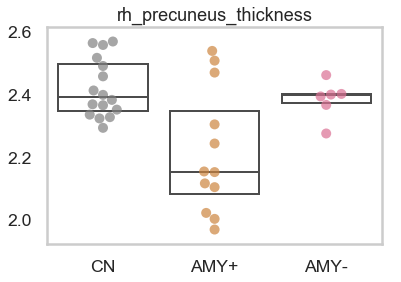

In [546]:
#selectiontitle = 'Subcortical Thickness Measures (aseg_stats)'
#statspathway = '/autofs/cluster/animal/scan_data/leads/recon/leads_aseg_stats.txt'
selectiontitle = 'Cortical Thickness Measures for '+'rh'+' (aparc_stats)'
statspathway = '/autofs/cluster/animal/scan_data/leads/recon/rh_leads_aparc_stats.txt'

# import dataset
df = pd.read_csv(statspathway, sep='\t',index_col=0)
df2 = pd.read_csv('/autofs/cluster/animal/scan_data/leads/recon/demographics', sep='\t', index_col=0, names=colnames)

# concatenate dataframes
df_final = df.join(df2)
newdf = df_final.drop(index='LDS0730001_20180619') # remove this invalid subject
rois = list(newdf)[:-1]
print(len(rois))
flatui = ["grey", "peru", "palevioletred"]


NAME = 'rh_precuneus_thickness'
#rh_entorhinal_thickness #rh_MeanThickness_thickness #rh_precuneus_thickness
#'EstimatedTotalIntraCranialVol' #'Left-Hippocampus' #Right-Hippocampus
# ttl = plt.suptitle(selectiontitle, fontsize=28)
# plot one figure
ax = plt
sns.set(style="whitegrid")
sns.set_context("poster", font_scale=.8, rc={"lines.linewidth": 2})
ax = sns.boxplot(x= 'Group', y=NAME, data=newdf, showcaps=False, boxprops={'facecolor':'None'}, showfliers=False, whiskerprops={'linewidth':0})
ax2 = sns.swarmplot(x= 'Group', y=NAME, hue='Group', data=newdf, palette=flatui, alpha=0.7, s=10)
ax2.set_ylabel('')
ax2.set_xlabel('')
#ax2.ticklabel_format(style='sci', axis='y')

ax2.axes.set_title(NAME, fontsize=18)
ax2.legend_.remove()
ax2.grid(False)
plt.savefig('/autofs/cluster/animal/scan_data/leads/recon/figures/'+NAME+'boxswarmplot.png', bbox_inches="tight")

In [535]:
df_final

newdf = df_final.drop(index='LDS0730001_20180619')

#newdf

,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,...,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,MaskVol,BrainSegVol-to-eTIV,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,EstimatedTotalIntraCranialVol,Group
Measure:volume,,,,,,,,,,,,,,,,,,,,,
LDS0370012_20180824,8738.6,206.6,15594.5,59224.0,6656.3,3580.5,4283.0,1939.1,736.7,1475.6,...,8.824472e+05,880533.0,1407259.0,0.739875,0.990285,38.0,23.0,61.0,1.421064e+06,CN
LDS0730001_20180619,4442.2,363.4,16028.9,52966.9,6535.7,3672.8,3671.2,1709.0,728.3,1155.7,...,9.259635e+05,922555.0,1433174.0,0.762730,1.019584,26.0,33.0,59.0,1.405645e+06,CN
LDS0110021_20181016,27904.0,933.0,13616.1,43600.3,6467.6,2779.2,4045.1,1796.3,2165.3,2024.2,...,7.630661e+05,761323.0,1390164.0,0.648955,0.947056,30.0,23.0,53.0,1.467879e+06,AMY+
LDS0370013_20180822,6697.4,254.9,17683.1,58624.6,8278.5,4156.3,4623.4,2043.5,720.4,1637.9,...,1.067776e+06,1064596.0,1618193.0,0.794925,1.041876,29.0,16.0,45.0,1.553154e+06,CN
LDS0730024_20181107,16562.7,1406.0,15405.9,61381.2,7501.0,3279.1,4409.1,1973.7,2709.6,2191.0,...,1.011772e+06,1009287.0,1682270.0,0.744041,1.043476,60.0,23.0,83.0,1.612179e+06,AMY-
LDS0110022_20181129,12586.0,380.3,14083.7,49305.9,6742.2,3019.0,4061.7,1844.2,1208.0,1006.2,...,8.300227e+05,826398.0,1417734.0,0.704438,1.010340,100.0,105.0,205.0,1.403224e+06,AMY+
LDS0370014_20180913,10101.0,346.2,14563.6,52588.3,7513.9,3080.8,4543.5,2036.3,856.2,1996.3,...,9.125120e+05,910188.0,1459400.0,0.736964,1.006162,20.0,18.0,38.0,1.450462e+06,AMY-
LDS3600030_20181219,22465.2,841.3,17297.0,58511.1,7201.1,3072.2,3905.7,1979.7,2498.3,2115.7,...,8.431524e+05,840739.0,1579260.0,0.658278,0.991433,44.0,41.0,85.0,1.592906e+06,AMY+
LDS0220026_20181109,20567.1,333.7,13420.9,50555.5,7022.1,3529.4,5162.0,1911.9,1299.3,3323.5,...,9.487462e+05,946080.0,1619776.0,0.733354,1.063986,30.0,28.0,58.0,1.522366e+06,CN


In [414]:
selectiontitle = 'Subcortical Thickness Measures (aseq_stats)'
statspathway = '/autofs/cluster/animal/scan_data/leads/recon/leads_aseg_stats.txt'
#selectiontitle = 'Cortical Thickness Measures for '+'rh'+' (aparc_stats)'
#statspathway = '/autofs/cluster/animal/scan_data/leads/recon/rh_leads_aparc_stats.txt'

# import dataset
df = pd.read_csv(statspathway, sep='\t') #,index_col=0)
df2 = df.T
#df = pd.read_csv('/autofs/cluster/animal/scan_data/leads/recon/demographics', sep='\t', index_col=0, names=colnames)


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
Measure:volume,LDS0370012_20180824,LDS0730001_20180619,LDS0110021_20181016,LDS0370013_20180822,LDS0730024_20181107,LDS0110022_20181129,LDS0370014_20180913,LDS3600030_20181219,LDS0220026_20181109,LDS0370015_20181113,...,LDS0370007_20180801,LDS0370029_20181210,LDS0370008_20180815,LDS0370034_20190107,LDS0370009_20180816,LDS0370037_20181218,LDS0370010_20180815,LDS0370038_20181217,LDS0370011_20180822,LDS0370042_20190108
Left-Lateral-Ventricle,8738.6,4442.2,27904,6697.4,16562.7,12586,10101,22465.2,20567.1,5266.2,...,64113.5,18565.4,11731.6,10560.5,15484.9,13320.5,10093.6,36707.7,6157.3,17062.5
Left-Inf-Lat-Vent,206.6,363.4,933,254.9,1406,380.3,346.2,841.3,333.7,57.5,...,4083.2,188.4,863.6,410,3155.9,255,659.1,795.8,154.8,950.7
Left-Cerebellum-White-Matter,15594.5,16028.9,13616.1,17683.1,15405.9,14083.7,14563.6,17297,13420.9,13857.5,...,16014.9,16478.9,15023,14598.9,15768.6,15805.1,16634.9,14210.5,17574.3,18492.8
Left-Cerebellum-Cortex,59224,52966.9,43600.3,58624.6,61381.2,49305.9,52588.3,58511.1,50555.5,47642,...,53102.2,52496.7,57012.3,54557.2,52731.1,58924.8,45259.3,52860.8,54604.4,51655.1
Left-Thalamus-Proper,6656.3,6535.7,6467.6,8278.5,7501,6742.2,7513.9,7201.1,7022.1,6732.7,...,6308.2,7528.6,7101.6,7393.8,3877.1,6915.8,6661.4,6321.9,7366.4,7119.6
Left-Caudate,3580.5,3672.8,2779.2,4156.3,3279.1,3019,3080.8,3072.2,3529.4,2776.9,...,3460.2,3502.9,3706.2,3163,1026.7,3185.5,3105.3,3199.6,3997.6,3887.6
Left-Putamen,4283,3671.2,4045.1,4623.4,4409.1,4061.7,4543.5,3905.7,5162,4990.3,...,3863,4977.7,4625.8,5325.9,2860.1,4250.4,3938.9,3682.4,4555.2,5105.3
Left-Pallidum,1939.1,1709,1796.3,2043.5,1973.7,1844.2,2036.3,1979.7,1911.9,1683.7,...,1844,1981.9,2129.6,2356,893.6,1965.5,1689.3,1849.9,1947.1,2082.5
3rd-Ventricle,736.7,728.3,2165.3,720.4,2709.6,1208,856.2,2498.3,1299.3,672,...,4819.5,1081,1548.8,1495.5,820.5,1458.1,671.4,2310.5,757,1398.9


40


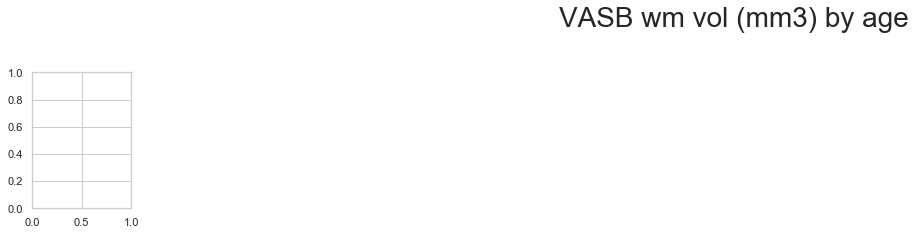

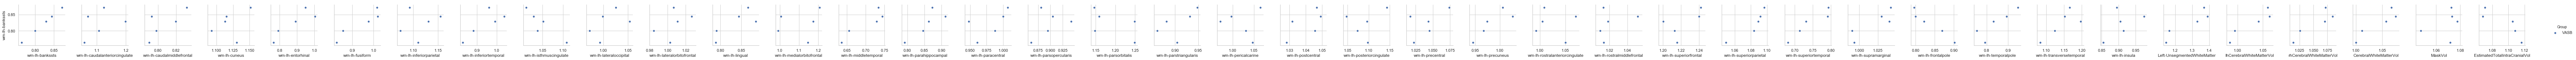

In [340]:
# df2 = pd.read_csv('/autofs/cluster/animal/users/rezzo/PPA/LvPPA/lvPPA_baseline/analyses_atypical_lvPPA_vs_lvPPA/dem_vasb.csv', index_col=0) #, names=colnames

# # concatenate dataframes
# df_final = combined_csv.join(df2)

# df_final.to_csv('/autofs/cluster/animal/users/rezzo/PPA/LvPPA/lvPPA_baseline/analyses_atypical_lvPPA_vs_lvPPA/WM_VOL_stats_VASB.csv')

# rois = list(df_final)[:-2]
# print(len(rois))

# # figure title
# selectiontitle = 'WM vol (mm3) by age'
# fig = plt.figure(figsize=(26, 13))
# fig.subplots_adjust(hspace=spacing, wspace=.52)
# ttl = fig.suptitle(selectiontitle, fontsize=28)
# ttl.set_position([.5, .95])

# trunc_aseg = make_wm_names(rois)
# # make a list from last row indices
# lastrow = parserow(rows, cols, rois)
# sns.set(style="whitegrid")
# ax = plt.subplot(rows, cols, counter)
# #ax = sns.lmplot(x='Age', y='wm-lh-supramarginal', hue='Group', data=df_final)
# ax = sns.pairplot(df_final, x_vars=rois, y_vars=[i],
#         hue="Group")
# #ax.set_xticklabels([])    

# plt.savefig('/autofs/cluster/animal/users/rezzo/PPA/LvPPA/lvPPA_baseline/analyses_atypical_lvPPA_vs_lvPPA/figures/VASB_VOL_by_AGE_lh_notnormalized.png')

